In [33]:
import sys, os, decimal, json, pathlib, glob
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [34]:
image_names = []
path = pathlib.Path(r'O:\eve_models\training_data\route_y')
for data in glob.glob(f"{path}\*.png"):
    file = data.split('\\')[-1:][0]
    image_names.append(file)

In [35]:
image_data = {}
f = open(f"{path}\\boxes.json")
image_data_raw = json.load(f)
f.close()

for data in image_data_raw:
    image_data[data['image_name']] = data['bbox'][1:2]
    
image_y = []
for image_name in tqdm(image_names):
    image_y.append(image_data[image_name][0])

100%|█████████████████████████████████████████████████████████████████████████| 1739/1739 [00:00<00:00, 1742033.59it/s]


In [36]:
data = { 'image_names':image_names, 'y':image_y}
df = pd.DataFrame(columns=['image_names','y'], data=data)
df

,image_names,y
0,001160f8-d4d1-11ed-a6da-2cf05d9fe8eb.png,343
1,0014a4f1-d4d4-11ed-8150-2cf05d9fe8eb.png,330
2,001c3640-d343-11ed-9f40-2cf05d9fe8eb.png,296
3,00684465-d4d2-11ed-be24-2cf05d9fe8eb.png,255
4,00789398-d4ce-11ed-8349-2cf05d9fe8eb.png,206
...,...,...
1734,ff6c2ff1-d4d1-11ed-a489-2cf05d9fe8eb.png,344
1735,ff73557c-d342-11ed-aef5-2cf05d9fe8eb.png,297
1736,ff7bddd6-d4cd-11ed-a33d-2cf05d9fe8eb.png,255
1737,ffb4fa64-d4cf-11ed-8899-2cf05d9fe8eb.png,466


<Axes: ylabel='Count'>

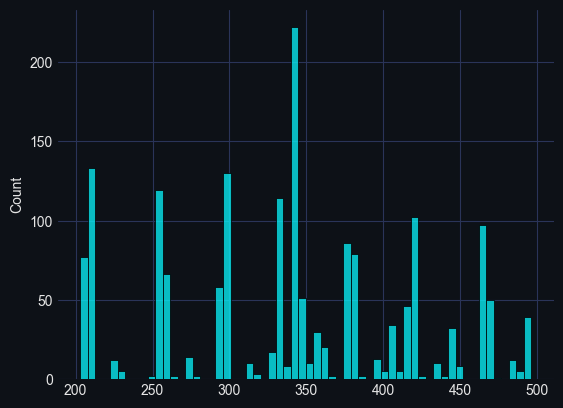

In [37]:
sns.histplot(image_y, bins=60)

In [38]:
df['bins'] = pd.cut(df['y'], bins=range(0,600,10))
df

,image_names,y,bins
0,001160f8-d4d1-11ed-a6da-2cf05d9fe8eb.png,343,"(340, 350]"
1,0014a4f1-d4d4-11ed-8150-2cf05d9fe8eb.png,330,"(320, 330]"
2,001c3640-d343-11ed-9f40-2cf05d9fe8eb.png,296,"(290, 300]"
3,00684465-d4d2-11ed-be24-2cf05d9fe8eb.png,255,"(250, 260]"
4,00789398-d4ce-11ed-8349-2cf05d9fe8eb.png,206,"(200, 210]"
...,...,...,...
1734,ff6c2ff1-d4d1-11ed-a489-2cf05d9fe8eb.png,344,"(340, 350]"
1735,ff73557c-d342-11ed-aef5-2cf05d9fe8eb.png,297,"(290, 300]"
1736,ff7bddd6-d4cd-11ed-a33d-2cf05d9fe8eb.png,255,"(250, 260]"
1737,ffb4fa64-d4cf-11ed-8899-2cf05d9fe8eb.png,466,"(460, 470]"


In [39]:
df['bin_id'] = 0
for i in df.index:
    df.loc[i, 'bin_id'] = df.loc[i, 'bins'].left
df['tick'] = 1

df.groupby('bin_id')['tick'].sum().sort_values(ascending=True)

bin_id
470      1
260      2
420      9
210     10
430     12
310     13
390     14
480     15
270     16
380     16
220     17
360     18
320     33
350     39
440     40
490     41
400     42
330    116
410    143
460    147
370    152
250    187
290    188
200    200
340    268
Name: tick, dtype: int64

In [40]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise
        
def copy(source, destination):
    with open(source, 'rb') as file:
        myFile = file.read()
    with open(destination, 'wb') as file:
        file.write(myFile)

In [41]:
black_image = np.array([[[0]*3]*1920]*1080)
black_image = Image.fromarray(black_image, mode='RGB')

In [42]:
import os, os.path
path = r'O:\eve_models\training_data\route_y_large_vert_class_v3'
unique_bins = df['bin_id'].unique()
for bin_id in unique_bins:
    mkdir_p(f"{path}\\{bin_id}")

In [44]:
source = r'O:\eve_models\training_data\route_y'
dest = r'O:\eve_models\training_data\route_y_large_vert_class_v3'
for i in tqdm(df.index):
    black_image = np.array([[[0]*3]*1920]*1080)
    black_image = Image.fromarray(black_image, mode='RGB')
    this_source = f"{source}\\{df.loc[i, 'image_names']}"
    img = Image.open(this_source)
    black_image.paste(img)
    this_dest = f"{dest}\\{df.loc[i, 'bin_id']}\\{df.loc[i, 'image_names']}"
    black_image.save(this_dest)
    #copy(this_source, this_dest)

100%|██████████████████████████████████████████████████████████████████████████████| 1739/1739 [13:58<00:00,  2.07it/s]
